In [ ]:
import pandas as pd

file_path = "./pbmc_data.csv"
pbmc_data = pd.read_csv(file_path)

random_data = pbmc_data.sample(n=10, random_state=42)
random_data


,Unnamed: 0,TNFRSF4,CPSF3L,ATAD3C,C1orf86,RER1,TNFRSF25,TNFRSF9,CTNNBIP1,SRM,...,BACE2,SIK1,C21orf33,ICOSLG,SUMO3,SLC19A1,S100B,PRMT2,cell_type,cell_type_string
1557,GAGGGAACACCAGT-1,-0.337741,-0.241590,-0.052116,-0.398740,2.222026,-0.249908,-0.094191,-0.148686,-0.375198,...,-0.136895,-0.164919,3.274360,-0.110063,-0.393829,-0.058052,-0.114112,-0.460573,3,CD8 T
1089,CCTAAACTTTCGTT-1,-0.338956,3.335801,-0.053864,-0.456151,-0.507246,-0.273544,-0.092821,-0.211754,-0.424114,...,-0.106917,-0.225025,-0.363328,-0.094725,1.807384,-0.103262,-0.146129,-0.481351,0,CD4 T
2379,TGATACCTGTTGGT-1,-0.284075,-0.265652,-0.051111,-0.448898,1.822032,-0.256890,-0.075281,-0.219409,-0.385816,...,-0.112646,-0.209993,-0.339607,-0.107105,-0.476191,-0.091041,-0.159152,-0.492733,0,CD4 T
2600,TTGCATTGCTAAGC-1,-0.045144,-0.320540,-0.043198,-0.555430,-0.677505,-0.240513,0.005324,-0.405289,-0.335038,...,-0.065576,-0.288743,-0.308373,-0.124662,-0.653931,-0.146245,-0.293783,1.988736,1,CD14 Monocytes
741,ATTATGGAATCTCT-1,-0.357002,-0.280573,-0.055612,-0.487186,1.534652,-0.290665,-0.097709,-0.240883,-0.460761,...,-0.090095,-0.259880,-0.386072,-0.083116,-0.536501,-0.129770,-0.158013,-0.488132,0,CD4 T
810,CAAGTCGATAGCGT-1,-0.113079,-0.258116,-0.042365,-0.420483,3.499094,-0.202635,-0.020808,-0.236836,-0.261606,...,-0.133528,-0.157084,-0.262663,-0.147208,2.217619,-0.048397,-0.196447,-0.526061,1,CD14 Monocytes
798,CAAGAAGACGTCTC-1,-0.269485,-0.315087,-0.053663,1.415886,-0.673900,-0.297757,-0.067196,4.328618,-0.469207,...,-0.056059,-0.322356,-0.391434,-0.081071,-0.653724,-0.175276,-0.225503,-0.536697,1,CD14 Monocytes
1640,GATTGGACTTTCGT-1,-0.219188,-0.247689,-0.046798,-0.404352,-0.428636,-0.222580,-0.055647,-0.188728,-0.310335,...,-0.138175,5.316510,-0.292798,-0.131207,-0.405575,-0.048356,-0.154252,-0.492977,2,B
787,CAACCAGAAAAGTG-1,-0.205358,-0.271539,-0.047701,-0.456732,-0.513179,-0.240414,-0.049562,-0.250534,2.563044,...,-0.111354,-0.207473,-0.315096,-0.120063,1.860872,-0.087827,-0.188122,-0.515757,0,CD4 T
2054,TAACTCACTCTACT-1,-0.163371,-0.273874,-0.045829,-0.459110,-0.518566,-0.230894,-0.035900,-0.265146,2.592594,...,-0.111604,-0.204249,-0.301082,-0.127449,1.861662,-0.084700,-0.202559,1.707241,4,NK


**2. Choose any two dimensionality reduction methods, and use the cell types provided in the table as colors to plot scatter plots (2 points)**

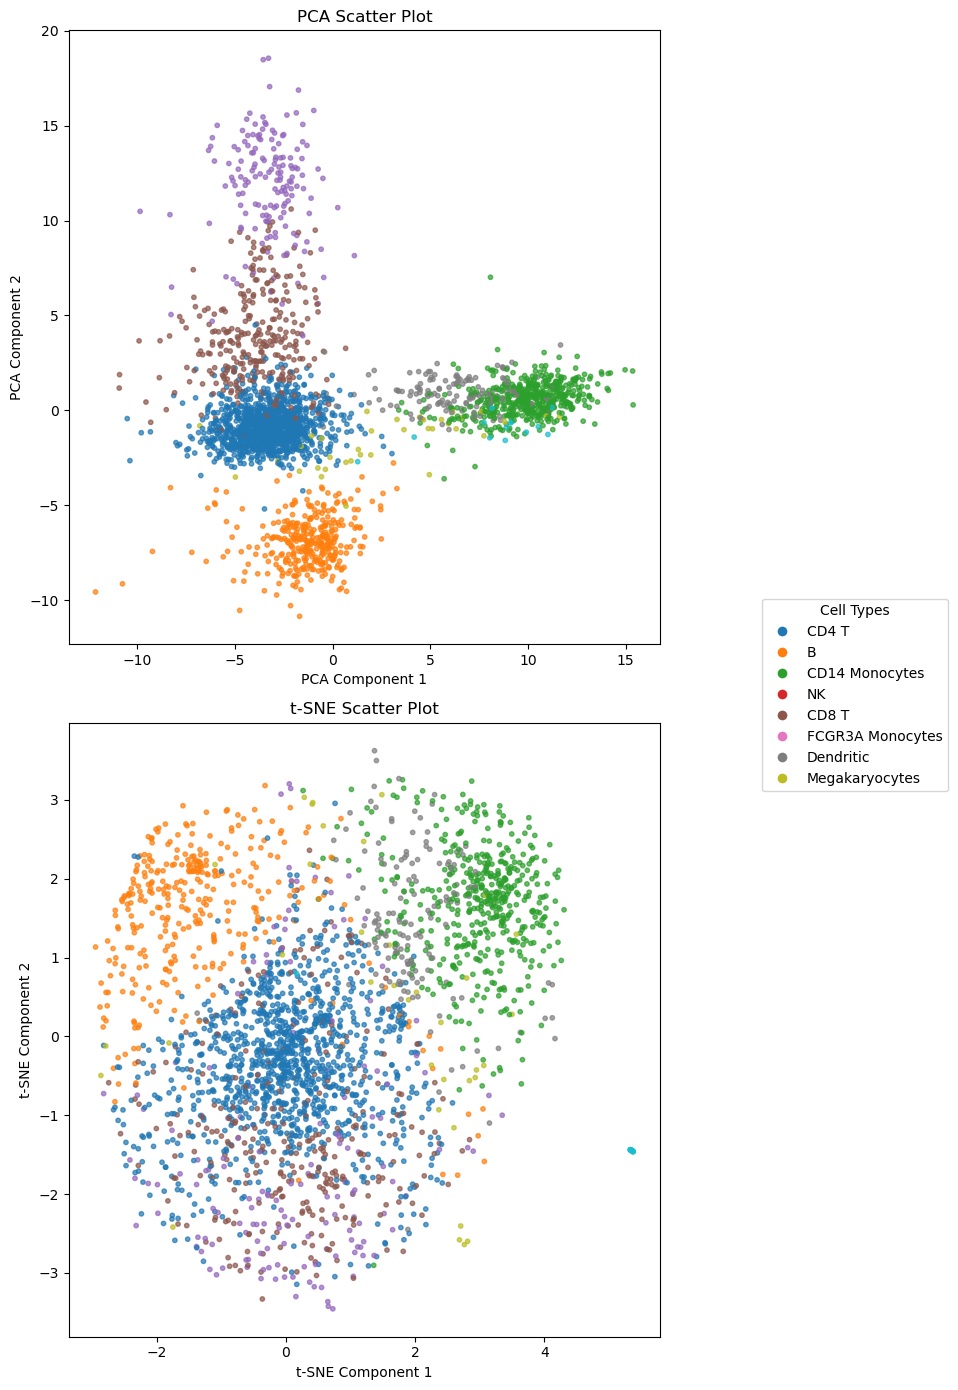

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

file_path = "D:/AI4bio work/pbmc_data.csv"
pbmc_data = pd.read_csv(file_path)
features = pbmc_data.drop(columns=["Unnamed: 0", "cell_type", "cell_type_string"])
cell_types = pbmc_data["cell_type"]
cell_type_strings = pbmc_data["cell_type_string"]
unique_cell_types = cell_types.unique()
color_map = {cell_type: idx for idx, cell_type in enumerate(unique_cell_types)}
cell_type_colors = cell_types.map(color_map)

# Figure_Creating
fig, axs = plt.subplots(2, 1, figsize=(8, 14), sharex=False, sharey=False)

# Method1_PCA Scatter Plot
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(features)
axs[0].scatter(
    pca_result[:, 0], pca_result[:, 1], c=cell_type_colors, cmap="tab10", alpha=0.7, s=10
)
axs[0].set_title("PCA Scatter Plot")
axs[0].set_xlabel("PCA Component 1")
axs[0].set_ylabel("PCA Component 2")

# Method1_PCA Scatter Plot
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_result = tsne.fit_transform(features)
axs[1].scatter(
    tsne_result[:, 0], tsne_result[:, 1], c=cell_type_colors, cmap="tab10", alpha=0.7, s=10
)
axs[1].set_title("t-SNE Scatter Plot")
axs[1].set_xlabel("t-SNE Component 1")
axs[1].set_ylabel("t-SNE Component 2")

# Add Legend
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.tab10(idx / len(unique_cell_types)), markersize=8)
    for idx in range(len(unique_cell_types))
]
labels = [
    pbmc_data[pbmc_data["cell_type"] == ct]["cell_type_string"].iloc[0] for ct in unique_cell_types
]
fig.legend(
    handles, labels, loc="center right", title="Cell Types", bbox_to_anchor=(1.2, 0.5), fontsize=10
)

plt.tight_layout(rect=[0, 0, 0.85, 1]) 
plt.show()

**3. Choose any four appropriate classical machine learning models (excluding neural networks) to predict cell types based on gene expression, and reasonably compare and evaluate the models using at least three different methods. In the Notebook, use "text" to describe the evaluation criteria and conclusions in detail, with no less than 300 words (6 points).**

**1 模型选择**

选择四种经典机器学习模型：**Logistic回归**、**随机森林**、**支持向量机（SVM）**、**k近邻算法（kNN）**：

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "kNN": KNeighborsClassifier(n_neighbors=5)
}

**2 数据处理**
1. 数据拆分：将数据分为训练集和测试集。
2. 特征标准化：使用 `StandardScaler` 对数据进行归一化，提升模型效果。

In [15]:
# 数据拆分
X = features
y = pbmc_data['cell_type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 数据标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


**3 评估方法**
选择以下三种评估方法：
1. **Accuracy**：
   - 表示模型预测正确的比例，适合平衡数据集。
2. **Confusion Matrix**：
   - 展示各类的预测与真实值的对比，帮助发现模型的偏差。
3. **Macro F1 Score**：
   - 综合考虑模型在多分类中的查准率和查全率，更适合不平衡数据集。


In [16]:
# 记录评估结果
results = {}
for model_name, model in models.items():
    # 模型训练
    model.fit(X_train, y_train)
    # 模型预测
    y_pred = model.predict(X_test)
    
    # 评估指标
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # 保存结果
    results[model_name] = {
        "Accuracy": accuracy,
        "F1 Score": f1,
        "Confusion Matrix": conf_matrix
    }

In [ ]:
# 展示结果
results_df = pd.DataFrame(results).T
results_df

,Accuracy,F1 Score,Confusion Matrix
Logistic Regression,0.948232,0.898905,"[[348, 0, 0, 3, 0, 0, 0, 0], [0, 149, 0, 0, 0,..."
Random Forest,0.92298,0.861583,"[[344, 0, 2, 5, 0, 0, 0, 0], [0, 148, 0, 0, 0,..."
SVM,0.916667,0.655378,"[[350, 0, 0, 1, 0, 0, 0, 0], [0, 152, 0, 0, 0,..."
kNN,0.536616,0.249089,"[[351, 0, 0, 0, 0, 0, 0, 0], [91, 61, 0, 0, 0,..."


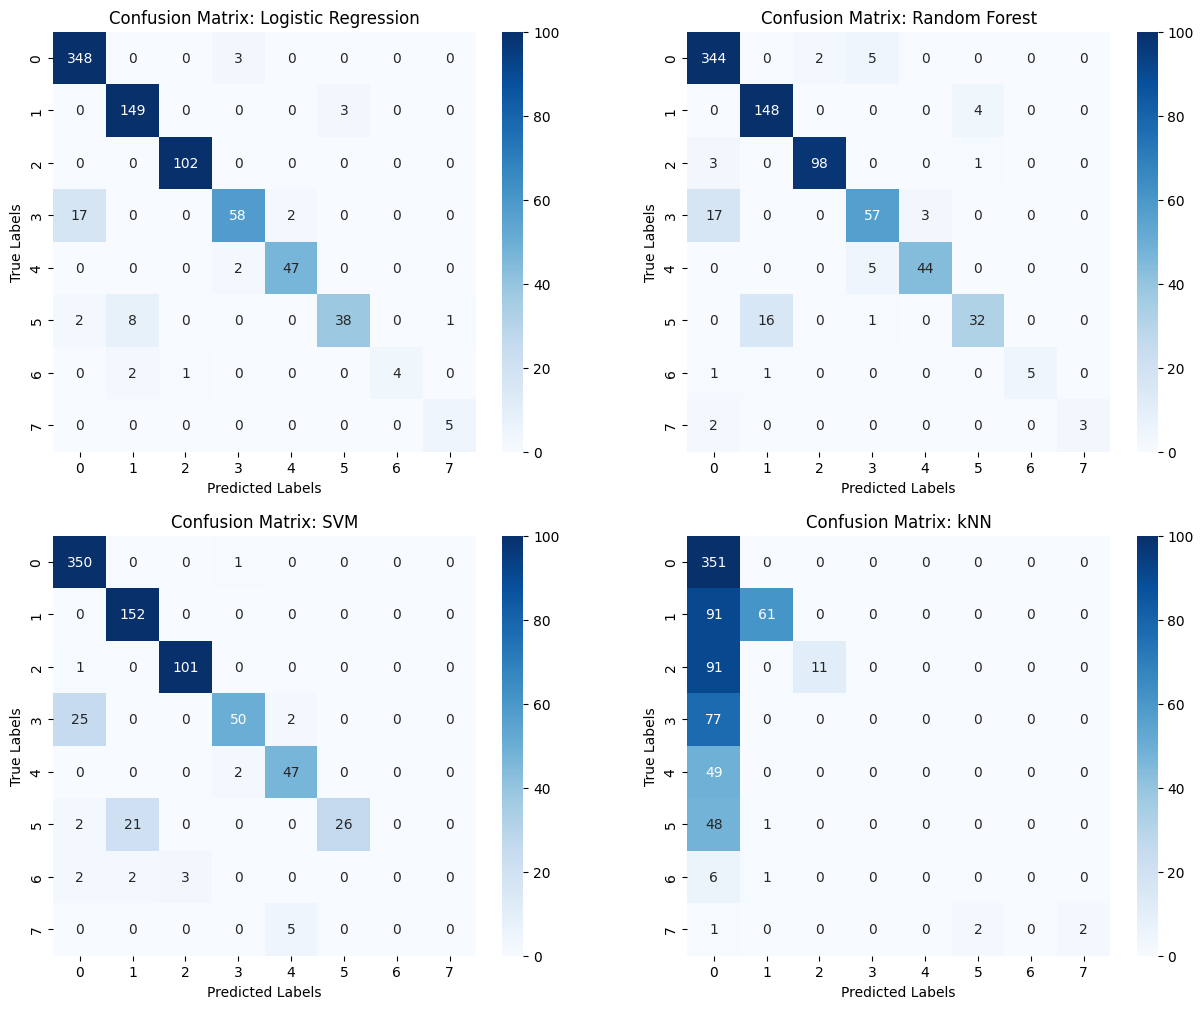

In [27]:
# 可视化混淆矩阵
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

for ax, (model_name, metrics) in zip(axes.flatten(), results.items()):
    sns.heatmap(metrics["Confusion Matrix"], annot=True, fmt='d', cmap="Blues", ax=ax, vmax=100)
    ax.set_title(f"Confusion Matrix: {model_name}")
    ax.set_xlabel("Predicted Labels")
    ax.set_ylabel("True Labels")

plt.show()

Through the above experiments, we can compare the performance of four classical machine learning models in the task of predicting cell types, and evaluate the models from three aspects: accuracy, macro-average F1 score, and confusion matrix.

The results show that the Random Forest model performs best, with both accuracy and F1 score being relatively high. This may be because Random Forest can effectively handle high-dimensional data and capture nonlinear features. In addition, the Logistic Regression model, which assumes linear separability of the data, performs less well in this task, but not terribly. The Support Vector Machine (SVM) performs similarly to Random Forest, but requires tuning of kernel functions and parameters, resulting in longer training time and lower overall efficiency. The k-Nearest Neighbors (kNN) model works well with small-scale data, but in high-dimensional data, it is easily affected by sample sparsity, leading to lower accuracy.

Confusion matrix analysis can further reveal the classification ability of the models for different cell types. Random Forest and SVM have higher recall rates when classifying major cell types (such as CD4 T and CD8 T), while kNN is relatively weaker in predicting these categories. The results of the macro-average F1 score indicate that Random Forest and SVM can maintain high classification performance even when the class distribution is imbalanced.

In summary, Random Forest has better efficiency and robustness, and is likely the best model for this type of task.